In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

In [64]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [65]:
x_train =x_train/255.0
x_test =x_test/255.0

In [66]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [67]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape  = (32, 32, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))


In [68]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x313ef90d0>>

In [69]:
history  = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 20s 24ms/step - loss: 1.5428 - accuracy: 0.4401 - val_loss: 1.3068 - val_accuracy: 0.5349
Epoch 2/5
782/782 [==============================] - 18s 23ms/step - loss: 1.1782 - accuracy: 0.5815 - val_loss: 1.0984 - val_accuracy: 0.6184
Epoch 3/5
782/782 [==============================] - 18s 24ms/step - loss: 1.0242 - accuracy: 0.6423 - val_loss: 1.0186 - val_accuracy: 0.6437
Epoch 4/5
782/782 [==============================] - 19s 24ms/step - loss: 0.9351 - accuracy: 0.6739 - val_loss: 1.0092 - val_accuracy: 0.6502
Epoch 5/5
782/782 [==============================] - 21s 26ms/step - loss: 0.8645 - accuracy: 0.6992 - val_loss: 0.8959 - val_accuracy: 0.6924


In [70]:
test_accuracy, test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8959 - accuracy: 0.6924


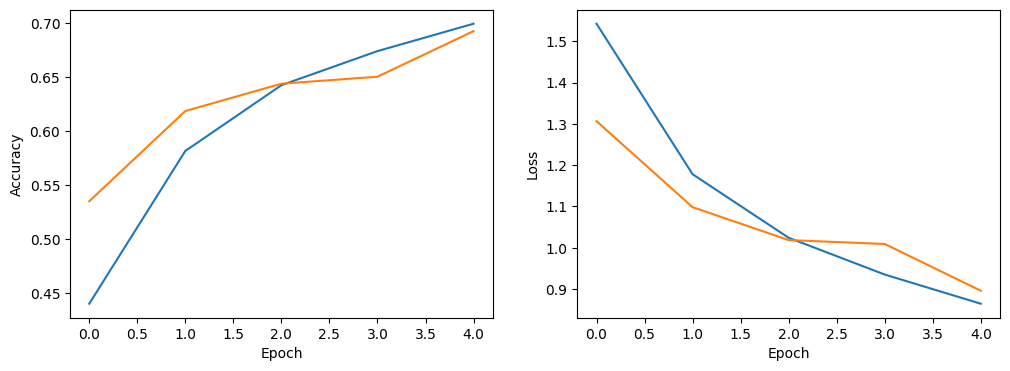

In [71]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()